In [1]:
# Import packages!

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import os
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
import sys
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
os.listdir('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/')

['O1_1_terrain_parameters - Sheet1.csv',
 'ModerateSlope_terrainparameters - Sheet1.csv',
 'GentleSlope_terrainparameters - Sheet1.csv',
 'SimpleGeometry_terrainparameters - Sheet1.csv',
 'ComplexGeometry_terrain_parameters - Sheet1.csv',
 'ModerateGeometry_terrainparameters - Sheet1.csv',
 'O2_2_terrain_parameters - Sheet1.csv',
 'O2_3_terrain_parameters - Sheet1.csv',
 'O2_4_terrain_parameters - Sheet1.csv',
 'O2_6_terrain_parameters - Sheet1.csv',
 'O2_5_terrain_parameters - Sheet1.csv',
 'O2_1_terrain_parameters - Sheet1.csv',
 'O1_2_terrain_parameters - Sheet1.csv',
 'GoogleSheets',
 'Totalsite_terrainparameters.csv',
 'SteepSlope_terrainparameters.csv',
 'ELA_training_data.csv']

In [5]:
# ALEXANDRA'S PATH TO DATA:
path_to_folder = ('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/ELA_training_data.csv/')


In [ ]:
fn = 'ELA'  # file name
file_path = os.path.join(path_to_folder, fn)
df = pd.read_csv(file_path)

In [ ]:
# Parameters to use for anomaly detection
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

# Select features and handle missing values
features = df[parameters]
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean values
imputed_features = imputer.fit_transform(features)

# Initialize Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model and predict anomalies
isolation_forest.fit(imputed_features)
anomaly_scores = isolation_forest.decision_function(imputed_features)
is_anomaly = isolation_forest.predict(imputed_features)

# Add anomaly scores and predictions to the DataFrame
df['AnomalyScore'] = anomaly_scores
df['IsAnomaly'] = is_anomaly

# Display anomalies
anomalies = df[df['IsAnomaly'] == -1]
print("Detected Anomalies:")
print(anomalies[parameters + ['AnomalyScore']])


Detected Anomalies:
       Area    Zmin    Zmax    Zmed  Slope  Aspect     Lmax  AnomalyScore
37  373.040   541.0  2893.0  1462.0    8.0    21.0  56055.0     -0.014804
43  145.592  1293.0  4514.0  2767.0   20.0    19.0  33356.0     -0.062693
45  307.536    67.0  1915.0  1180.0    5.0   300.0  34088.0     -0.012183
68  549.286    12.0  3161.0   739.0    6.0   132.0  54535.0     -0.065406
74   86.656   873.0  2236.0  1768.0    4.0   359.0  30019.0     -0.000402


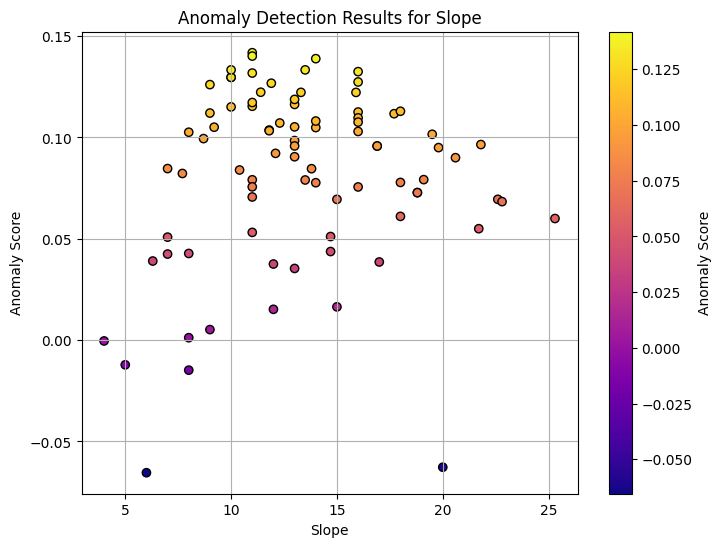

In [ ]:

# Parameters to use for anomaly detection
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

# Select features and handle missing values
features = df[parameters]
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean values
imputed_features = imputer.fit_transform(features)

# Initialize Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model and predict anomalies
isolation_forest.fit(imputed_features)
anomaly_scores = isolation_forest.decision_function(imputed_features)
df['AnomalyScore'] = anomaly_scores

# Plotting anomaly scores against a specific parameter (e.g., 'Area')
param_to_plot = 'Slope'  # Change this to the parameter you want to visualize

plt.figure(figsize=(8, 6))
plt.scatter(df[param_to_plot], df['AnomalyScore'], c=df['AnomalyScore'], cmap='plasma', edgecolor = 'black')
plt.colorbar(label='Anomaly Score')
plt.xlabel(param_to_plot)
plt.ylabel('Anomaly Score')
plt.title(f'Anomaly Detection Results for {param_to_plot}')
plt.grid(True)
plt.show()


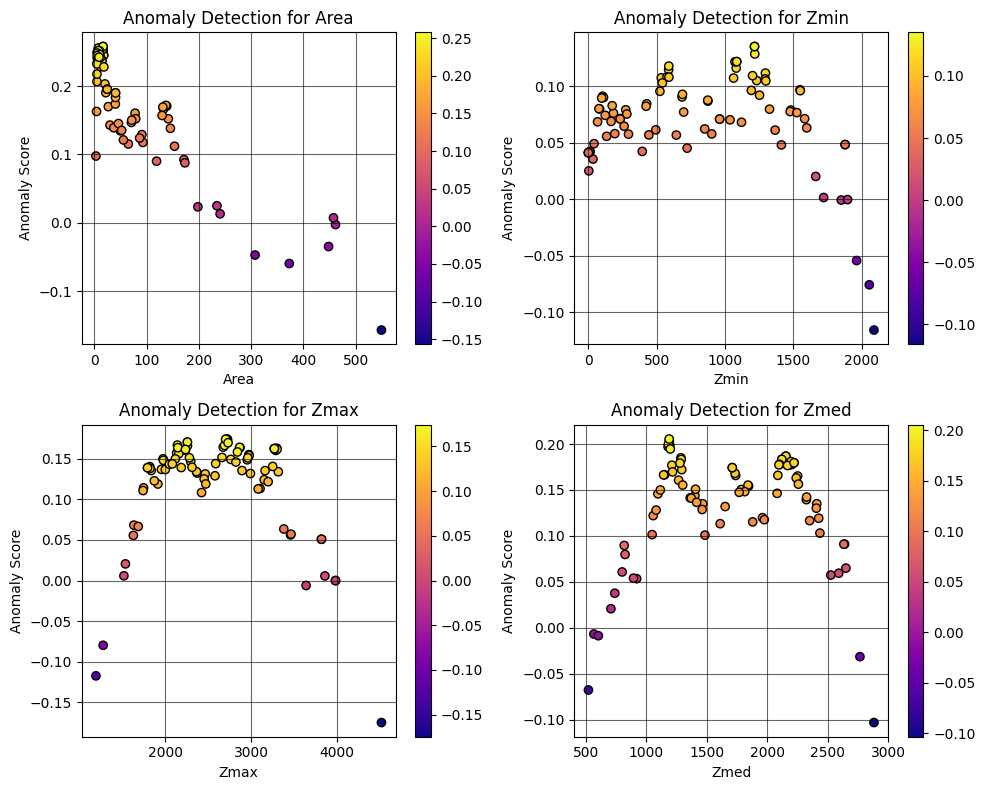

In [ ]:
# Parameters to use for anomaly detection
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

# Initialize Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

plt.figure(figsize=(10, 8))

for i, param in enumerate(parameters[:4], 1):  # Limiting to 4 parameters for 2x2 subplots
    # Select features and handle missing values
    features = df[[param]]
    imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean values
    imputed_features = imputer.fit_transform(features)

    # Fit the model and predict anomalies
    isolation_forest.fit(imputed_features)
    anomaly_scores = isolation_forest.decision_function(imputed_features)
    df[f'{param}_AnomalyScore'] = anomaly_scores

    # Plotting
    plt.subplot(2, 2, i)
    plt.scatter(df[param], df[f'{param}_AnomalyScore'], c=df[f'{param}_AnomalyScore'], cmap='plasma', edgecolor = 'black')
    plt.grid(color = 'black',alpha = 0.6)
    #plt.colorbar(label='Anomaly Score')
    plt.colorbar()
    plt.xlabel(param)
    plt.ylabel('Anomaly Score')
    plt.title(f'Anomaly Detection for {param}')

plt.tight_layout()
plt.show()




In [ ]:
#May mean sudden changes in slope, outliers in slope measurements, localized variations, or uncommon patterns or trends.
# Would something like this be an indicator of events occuring or significant, sudden changes?

#Would I be able to use this figure to provide insight into future work?

<ipython-input-46-1550523fae3b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AnomalyScore'], shade=True, color='darkblue')


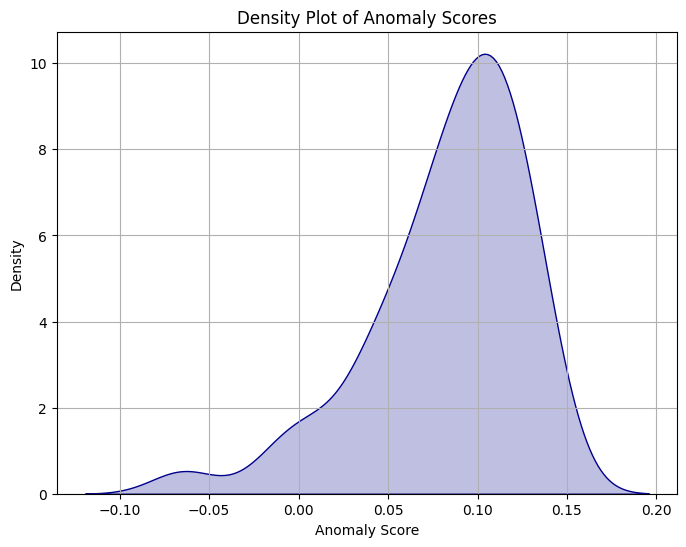

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(df['AnomalyScore'], shade=True, color='darkblue')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Density Plot of Anomaly Scores')
plt.grid(True)
plt.show()
